In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack, csr_matrix

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)
print(X)

                                                    tweet  followers_count  \
0       @POTUS Biden Blunders - 6 Month Update\n\nInfl...           4262.0   
1       @S0SickRick @Stairmaster_ @6d6f636869 Not as m...           1393.0   
2       THE SUPREME COURT is siding with super rich pr...              9.0   
3       @POTUS Biden Blunders\n\nBroken campaign promi...           4262.0   
4       @OhComfy I agree. The confluence of events rig...             70.0   
...                                                   ...              ...   
134193  Joe Biden's family owned African slaves....\n\...           2075.0   
134194  Joe Bidens great, great grandfather was a slav...           1636.0   
134195  @ChevyChaseToGo "Joe Bidens great-grandfather ...            286.0   
134196  @JoeBiden Facts are Bidens VP Kamala Harris Gr...              2.0   
134197  @sunny Yes representation matters. Did you kno...            178.0   

        friends_count  favourites_count  statuses_count  listed

In [22]:
from scipy.sparse import hstack, csr_matrix# Load the dataset
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [23]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess a single tweet
def preprocess_tweet(tweet):
    # 1. Convert to lowercase
    tweet = tweet.lower()
    
    # 2. Remove URLs, mentions (@username), hashtags, and special characters
#     tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # Remove URLs
#     tweet = re.sub(r'@\w+|\#', '', tweet)  # Remove mentions and hashtags
#     tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation and special characters
    
    # 3. Tokenization (split the tweet into words)
    words = tweet.split()
    
    # 4. Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the words back into a single string
    return ' '.join(words)


In [24]:
# Apply preprocessing to the 'tweet' column
X['processed_tweet'] = X['tweet'].apply(preprocess_tweet)

# Convert tweets to TF-IDF features
tweets = X['processed_tweet'].astype(str).values
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = vectorizer.fit_transform(tweets)

# Reduce TF-IDF dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

X_other = X.drop(['tweet','processed_tweet'], axis=1, errors='ignore')

# Ensure non-text features are numeric and fill NaNs
X_other = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert X_other to sparse format
X_other_sparse = csr_matrix(X_other.values)

# Combine the reduced TF-IDF features with the other features
X_combined = hstack([X_other_sparse, csr_matrix(tfidf_reduced)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

Accuracy: 0.8985842026825633
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.88      0.89     19442
        True       0.89      0.92      0.90     20818

    accuracy                           0.90     40260
   macro avg       0.90      0.90      0.90     40260
weighted avg       0.90      0.90      0.90     40260

F1 Score for Fake Class: 0.9035185141425837


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack, csr_matrix

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

In [26]:
#doesnt preprocess the tweet 
# Extract the tweet text and labels
tweets = X['tweet'].astype(str).values  # Using 'tweet' as the text input
labels = y.values  # Assuming this is the target label

# Create a TF-IDF vectorizer with a limited vocabulary size
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
tfidf_features = vectorizer.fit_transform(tweets)  # Keep this as a sparse matrix

# Apply TruncatedSVD for dimensionality reduction on TF-IDF features
svd = TruncatedSVD(n_components=100, random_state=42)  # Reduce to 100 components
tfidf_reduced = svd.fit_transform(tfidf_features)

# Combine TF-IDF reduced features with the rest of your features
extra_features = X.drop(columns=['tweet'])  # Drop non-feature columns

# Ensure all extra features are numeric, convert or fill NaNs
extra_features = extra_features.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors to NaN
extra_features.fillna(0, inplace=True)  # Fill NaN values with 0 (or another strategy)

# Convert extra features to a sparse matrix
extra_features_sparse = csr_matrix(extra_features.values)

# Combine the extra sparse features with the reduced TF-IDF features
combined_features = hstack([extra_features_sparse, csr_matrix(tfidf_reduced)])  # Combine both as sparse matrices

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier with optimizations
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)  # 50 trees and use all CPU cores
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

Accuracy: 0.8423000496770988
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.83      0.84     19442
        True       0.84      0.86      0.85     20818

    accuracy                           0.84     40260
   macro avg       0.84      0.84      0.84     40260
weighted avg       0.84      0.84      0.84     40260

F1 Score for Fake Class: 0.8489448264376294


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack, csr_matrix

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

In [28]:
#just using the numerical features and no tweets

X = X.drop(['tweet'],axis=1)

# Ensure all extra features are numeric, convert or fill NaNs
extra_features = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors to NaN
extra_features.fillna(0, inplace=True)  # Fill NaN values with 0 (or another strategy)

# Convert extra features to a sparse matrix
extra_features_sparse = csr_matrix(extra_features.values)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(extra_features_sparse, labels, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier with optimizations
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)  # 50 trees and use all CPU cores
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

Accuracy: 0.6668653750620964
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.68      0.66     19442
        True       0.69      0.65      0.67     20818

    accuracy                           0.67     40260
   macro avg       0.67      0.67      0.67     40260
weighted avg       0.67      0.67      0.67     40260

F1 Score for Fake Class: 0.669051966638701


In [19]:
#then use randomized search CV
#since ... has the best result we'll use that
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

# Apply preprocessing to the 'tweet' column
X['processed_tweet'] = X['tweet'].apply(preprocess_tweet)

# Convert tweets to TF-IDF features
tweets = X['processed_tweet'].astype(str).values
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = vectorizer.fit_transform(tweets)

# Reduce TF-IDF dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

X_other = X.drop(['tweet','processed_tweet'], axis=1, errors='ignore')

# Ensure non-text features are numeric and fill NaNs
X_other = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert X_other to sparse format
X_other_sparse = csr_matrix(X_other.values)

# Combine the reduced TF-IDF features with the other features
X_combined = hstack([X_other_sparse, csr_matrix(tfidf_reduced)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)


# Define the Random Forest model and hyperparameters
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(
#     rf_model, param_distributions=param_dist, n_iter=6, cv=2, 
#     verbose=2, random_state=42, n_jobs=-1
# )
# Define a recall scorer for the positive class (fake news)
f1_scorer = make_scorer(f1_score, pos_label=1)  # Assuming 1 represents the "fake" class

# Set up RandomizedSearchCV with the F1 scorer
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=6, 
    cv=2, 
    scoring=f1_scorer,  # Prioritize F1 score
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions and evaluate the model
y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 107}
Accuracy: 0.9010680576254346
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.88      0.90     19442
        True       0.89      0.92      0.91     20818

    accuracy                           0.90     40260
   macro avg       0.90      0.90      0.90     40260
weighted avg       0.90      0.90      0.90     40260

F1 Score for Fake Class: 0.9060856853174883


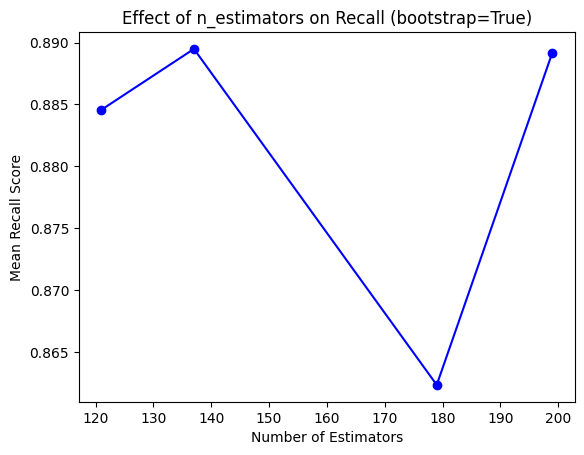

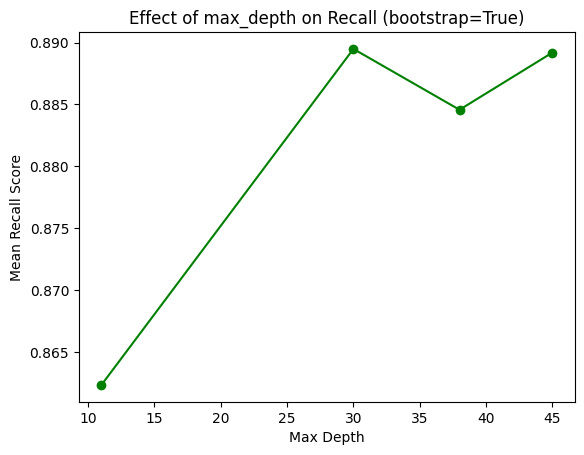

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert cv_results_ to DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Filter for rows where bootstrap=True
results_bootstrap_true = results[results['param_bootstrap'] == True]

# Plot n_estimators vs. mean_test_score (mean recall score) for bootstrap=True
results_bootstrap_true = results_bootstrap_true.sort_values(by='param_n_estimators')
plt.plot(results_bootstrap_true['param_n_estimators'], results_bootstrap_true['mean_test_score'], marker='o', color='blue', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Recall Score')
plt.title('Effect of n_estimators on Recall (bootstrap=True)')
plt.show()

# Plot max_depth vs. mean_test_score (mean recall score) for bootstrap=True if max_depth was a parameter
if 'param_max_depth' in results.columns:
    results_bootstrap_true = results_bootstrap_true.sort_values(by='param_max_depth')
    plt.plot(results_bootstrap_true['param_max_depth'], results_bootstrap_true['mean_test_score'], marker='o', color='green', linestyle='-')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Recall Score')
    plt.title('Effect of max_depth on Recall (bootstrap=True)')
    plt.show()


In [32]:
#then use randomized search CV
#since ... has the best result we'll use that
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

# Apply preprocessing to the 'tweet' column
X['processed_tweet'] = X['tweet'].apply(preprocess_tweet)

# Convert tweets to TF-IDF features
tweets = X['processed_tweet'].astype(str).values
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = vectorizer.fit_transform(tweets)

# Reduce TF-IDF dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

X_other = X.drop(['tweet','processed_tweet'], axis=1, errors='ignore')

# Ensure non-text features are numeric and fill NaNs
X_other = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert X_other to sparse format
X_other_sparse = csr_matrix(X_other.values)

# Combine the reduced TF-IDF features with the other features
X_combined = hstack([X_other_sparse, csr_matrix(tfidf_reduced)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)


param_dist = {
    'n_estimators': randint(50, 200),  # Range for number of estimators to be optimized
    'max_depth': [30],                 # Fixed max_depth
    'bootstrap': [True]                # Fixed bootstrap
}

rf_model = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(
#     rf_model, param_distributions=param_dist, n_iter=6, cv=2, 
#     verbose=2, random_state=42, n_jobs=-1
# )
# Define a recall scorer for the positive class (fake news)
f1_scorer = make_scorer(f1_score, pos_label=1)  # Assuming 1 represents the "fake" class

# Set up RandomizedSearchCV with the F1 scorer
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=6, 
    cv=2, 
    scoring=f1_scorer,  # Prioritize F1 score
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions and evaluate the model
y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 152}
Accuracy: 0.8987580725285643
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.87      0.89     19442
        True       0.89      0.92      0.90     20818

    accuracy                           0.90     40260
   macro avg       0.90      0.90      0.90     40260
weighted avg       0.90      0.90      0.90     40260

F1 Score for Fake Class: 0.9039766302299284


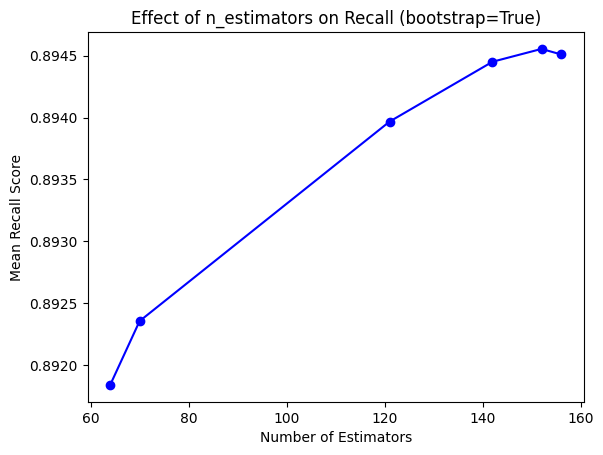

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert cv_results_ to DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Filter for rows where bootstrap=True
results_bootstrap_true = results[results['param_bootstrap'] == True]

# Plot n_estimators vs. mean_test_score (mean recall score) for bootstrap=True
results_bootstrap_true = results_bootstrap_true.sort_values(by='param_n_estimators')
plt.plot(results_bootstrap_true['param_n_estimators'], results_bootstrap_true['mean_test_score'], marker='o', color='blue', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Recall Score')
plt.title('Effect of n_estimators on Recall (bootstrap=True)')
plt.show()

In [34]:
#then use randomized search CV
#since ... has the best result we'll use that
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

# Apply preprocessing to the 'tweet' column
X['processed_tweet'] = X['tweet'].apply(preprocess_tweet)

# Convert tweets to TF-IDF features
tweets = X['processed_tweet'].astype(str).values
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = vectorizer.fit_transform(tweets)

# Reduce TF-IDF dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

X_other = X.drop(['tweet','processed_tweet'], axis=1, errors='ignore')

# Ensure non-text features are numeric and fill NaNs
X_other = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert X_other to sparse format
X_other_sparse = csr_matrix(X_other.values)

# Combine the reduced TF-IDF features with the other features
X_combined = hstack([X_other_sparse, csr_matrix(tfidf_reduced)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)


param_dist = {
    'n_estimators': [139],  # Range for number of estimators to be optimized
    'max_depth': randint(10, 50),                 # Fixed max_depth
    'bootstrap': [True]                # Fixed bootstrap
}

rf_model = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(
#     rf_model, param_distributions=param_dist, n_iter=6, cv=2, 
#     verbose=2, random_state=42, n_jobs=-1
# )
# Define a recall scorer for the positive class (fake news)
f1_scorer = make_scorer(f1_score, pos_label=1)  # Assuming 1 represents the "fake" class

# Set up RandomizedSearchCV with the F1 scorer
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=6, 
    cv=2, 
    scoring=f1_scorer,  # Prioritize F1 score
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions and evaluate the model
y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

# Convert cv_results_ to DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Filter for rows where bootstrap=True
results_bootstrap_true = results[results['param_bootstrap'] == True]

if 'param_max_depth' in results.columns:
    results_bootstrap_true = results_bootstrap_true.sort_values(by='param_max_depth')
    plt.plot(results_bootstrap_true['param_max_depth'], results_bootstrap_true['mean_test_score'], marker='o', color='green', linestyle='-')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Recall Score')
    plt.title('Effect of max_depth on Recall (bootstrap=True)')
    plt.show()

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Parameters: {'bootstrap': True, 'max_depth': 48, 'n_estimators': 139}
Accuracy: 0.8990064580228515
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.87      0.89     19442
        True       0.89      0.92      0.90     20818

    accuracy                           0.90     40260
   macro avg       0.90      0.90      0.90     40260
weighted avg       0.90      0.90      0.90     40260

F1 Score for Fake Class: 0.9041760935143288


F1 Score for Fake Class: 0.9041760935143288


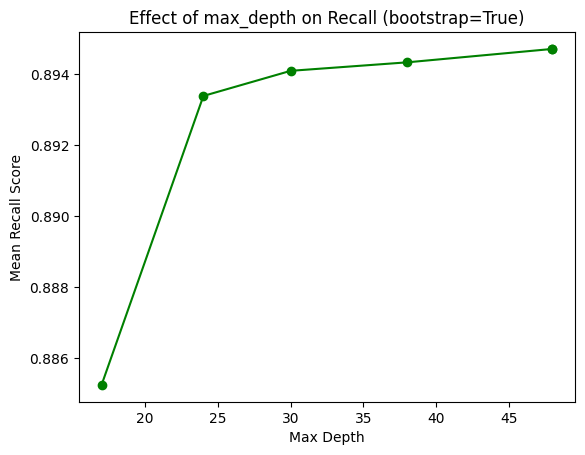

In [36]:
# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

# Convert cv_results_ to DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Filter for rows where bootstrap=True
results_bootstrap_true = results[results['param_bootstrap'] == True]

if 'param_max_depth' in results.columns:
    results_bootstrap_true = results_bootstrap_true.sort_values(by='param_max_depth')
    plt.plot(results_bootstrap_true['param_max_depth'], results_bootstrap_true['mean_test_score'], marker='o', color='green', linestyle='-')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Recall Score')
    plt.title('Effect of max_depth on Recall (bootstrap=True)')
    plt.show()

In [31]:
#then use randomized search CV
#since ... has the best result we'll use that
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df = df.drop('Unnamed: 0', axis=1)  # Dropping unnecessary column

def replace_spaces_with_commas(emb_str):
    return emb_str.replace(' ', ',')

# Apply the function to the embeddings column
df['embeddings'] = df['embeddings'].apply(replace_spaces_with_commas)

# Function to extract the list from the string representation
def extract_list(emb_str):
    # Remove outer brackets and convert the string to a list
    return eval(emb_str.strip("[]"))

# Apply the function and create a DataFrame from the list of embeddings
embeddings_split = df['embeddings'].apply(extract_list).apply(pd.Series)

# Rename columns to reflect the split embedding positions
embeddings_split.columns = [f'embedding_{i}' for i in range(embeddings_split.shape[1])]

# Concatenate the original DataFrame with the new embeddings DataFrame
df = pd.concat([df, embeddings_split], axis=1)
df = df.drop(['embeddings'], axis=1)

# Separate features and target variable
y = df['majority_target']
X = df.drop(['majority_target', 'statement', 'BinaryNumTarget'], axis=1)

# Apply preprocessing to the 'tweet' column
X['processed_tweet'] = X['tweet'].apply(preprocess_tweet)

# Convert tweets to TF-IDF features
tweets = X['processed_tweet'].astype(str).values
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = vectorizer.fit_transform(tweets)

# Reduce TF-IDF dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

X_other = X.drop(['tweet','processed_tweet'], axis=1, errors='ignore')

# Ensure non-text features are numeric and fill NaNs
X_other = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert X_other to sparse format
X_other_sparse = csr_matrix(X_other.values)

# Combine the reduced TF-IDF features with the other features
X_combined = hstack([X_other_sparse, csr_matrix(tfidf_reduced)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)


from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': randint(3, 10),  # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate (eta)
    'subsample': uniform(0.6, 0.4),  # Fraction of samples to use per tree
    'colsample_bytree': uniform(0.6, 0.4),  # Fraction of features to use per tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight (Hessian)
    'gamma': uniform(0, 0.5),  # Minimum loss reduction required to make a further partition
}

# Create a RandomizedSearchCV instance
random_search_xgb = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=20, cv=3,
    verbose=2, random_state=42, n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Get the best estimator and print the best parameters
best_xgb_model = random_search_xgb.best_estimator_
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Make predictions using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.6062545626964776, 'gamma': 0.2117007403531848, 'learning_rate': 0.1284644554526709, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 130, 'subsample': 0.88453678109946}
XGBoost Accuracy: 0.9100596125186289
XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.90      0.91     19442
        True       0.91      0.92      0.91     20818

    accuracy                           0.91     40260
   macro avg       0.91      0.91      0.91     40260
weighted avg       0.91      0.91      0.91     40260

F1 Score for Fake Class: 0.669051966638701


In [35]:
# Calculate the F1 score specifically for the "fake" class
f1_fake = f1_score(y_test, y_pred_xgb, pos_label=1)
print("F1 Score for Fake Class:", f1_fake)

F1 Score for Fake Class: 0.9136150010735501
